# A Gaussian Integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from numpy import random as rnd

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

Using Monte Carlo integration, I check that

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 $$


For a fixed N and a variable sigma.


Monte Carlo result: 0.0001986683752770205
True result: 0.00020000000000000004
Monte Carlo result: 0.3440243296424685
True result: 0.3449625361987503
Monte Carlo result: 3.9683430452791124
True result: 3.9957201950922143
Monte Carlo result: 17.969198325816574
True result: 18.053372839506185
Monte Carlo result: 53.846295981661456
True result: 53.83632449321753
Monte Carlo result: 127.75217257806631
True result: 126.88048334095416
Monte Carlo result: 255.13348463594528
True result: 256.9392617283952
Monte Carlo result: 472.2454190763701
True result: 467.9835761621708
Monte Carlo result: 791.5391695455972
True result: 788.2018473098614
Monte Carlo result: 1246.6438401350865
True result: 1250.0


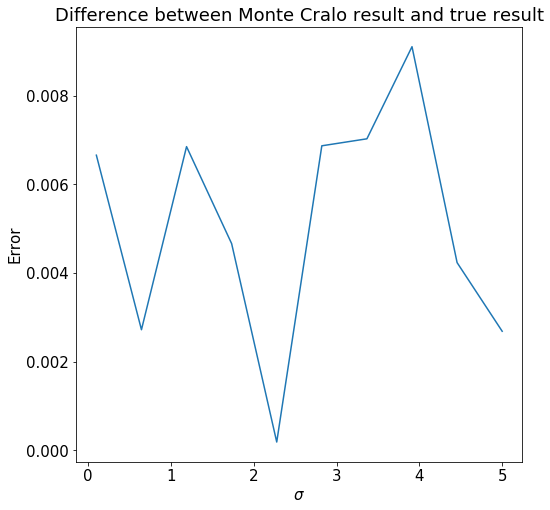

In [2]:
#for fixed N and variable sigma

N = int(1e5)
sigma = np.linspace(0.1, 5, 10)
error = np.zeros(len(sigma))

for i in range(len(sigma)):
    gauss = np.absolute(np.random.normal(loc=0, scale=sigma[i], size=N)) #gaussian
    
    I = sigma[i]*(np.pi/2)**0.5*np.mean(gauss**3) #integral through Monte Carlo
    
    true_result = 2*sigma[i]**4 #true result of the integral
    
    error[i] = np.abs((I-true_result)/true_result) #error between the result obtained with MC and the true result
    
    print("Monte Carlo result:", I)
    print("True result:", true_result)
       

#plot the differnce between the Monte Carlo result and the true result of the integral
plt.plot(sigma, error)
plt.xlabel("$\sigma$")
plt.ylabel("Error")
plt.title("Difference between Monte Cralo result and true result")
plt.show()

Now I fix sigma and change the number of samples N.

Monte Carlo result: 173.0375031043193
True result: 162
Monte Carlo result: 161.37391545506736
True result: 162
Monte Carlo result: 161.4347138458533
True result: 162
Monte Carlo result: 162.039333519819
True result: 162
Monte Carlo result: 163.305172092379
True result: 162
Monte Carlo result: 161.93613839962987
True result: 162
Monte Carlo result: 161.56164278995317
True result: 162
Monte Carlo result: 162.03753222790598
True result: 162
Monte Carlo result: 161.97966176501265
True result: 162
Monte Carlo result: 162.22840708892292
True result: 162


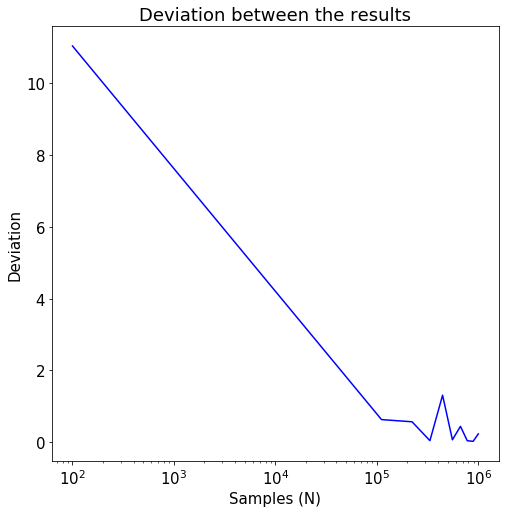

In [3]:
#Fixed sigma and changing N

sigma = 3
N = np.linspace(100, 1e6, 10, dtype=int) #number of samples
dev = np.zeros(len(N)) #deviation between the results

for i in range(len(N)):
    gauss = np.absolute(np.random.normal(loc=0, scale=sigma, size=N[i])) #gaussian
    
    I = sigma*(np.pi/2)**0.5*np.mean(gauss**3) #integral through Monte Carlo
    
    true_result = 2*sigma**4 #true result of the integral
    
    dev[i] = np.abs(true_result-I) #deviation between the result obtained with MC and the true result
    
    print("Monte Carlo result:", I)
    print("True result:", true_result)

#plot the differnce between the Monte Carlo result and the true result of the integral
plt.plot(N, dev, color='b')
#plt.hlines(0, min(N), max(N), color='r', linestyle='dashed')
plt.xlabel("Samples (N)")
plt.ylabel("Deviation")
plt.xscale('log')
plt.title("Deviation between the results")
plt.show()    

The higher is N, the more similar is the value of the integral to the known result.
Smaller N means to have a bigger difference between the integral result and the known result. (The integral result is smaller than the known result).

Now, in order to study the distribution of the results I fix both sigma and N.

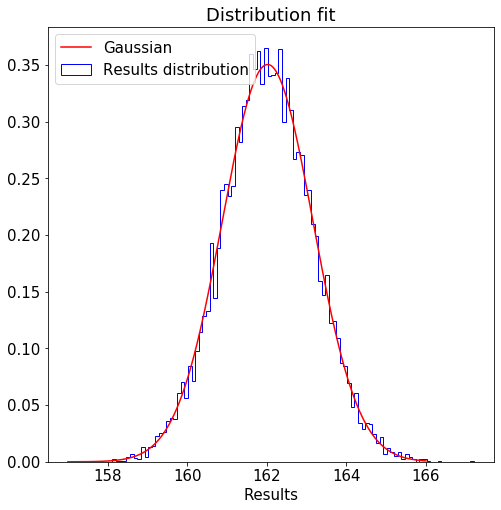

In [4]:
#fixed N and sigma

N = int(1e5)
sigma = 3
results = int(1e4) #I also fix the number of the results that we can obtain

distrib = np.zeros(results)

for i in range(results):
    gauss = np.absolute(np.random.normal(loc=0, scale=sigma, size=N)) #gaussian
    
    I = sigma*(np.pi/2)**0.5*np.mean(gauss**3) #integral through Monte Carlo
    
    true_result = 2*sigma**4 #true result of the integral
    
    distrib[i] = I
    
    #print("Monte Carlo result:", I)
    #print("True result:", true_result)

plt.hist(distrib, bins = 100, density=True, label='Results distribution', color='b', histtype='step')
plt.title('Distribution fit')
plt.xlabel('Results')

mean = np.mean(distrib)
std = np.std(distrib)
distGauss = scipy.stats.norm(loc=mean, scale=std)
x = np.linspace(157, 166, 1000)
plt.plot(x, distGauss.pdf(x), c='red', label='Gaussian')
plt.legend(loc='upper left')
plt.show()
    
    

We observe that the results follow a Gaussian distribution.